# Supervised Learning: Heart Disease Conditions


## Problem Statement

### Context

 Cleveland heart disease dataset typically revolves around prediction of heart disease conditions presence in patients based on various medical attributes. The objective is to build a predictive model that can assist healthcare professionals in diagnosing heart disease more accurately and efficiently


### Objective

To develop a supervised machine learning model that accurately predicts the presence of heart disease conditions in patients based on their medical attributes. The goal is to assist healthcare professionals in early diagnosis and intervention, potentially improving patient outcomes and reducing healthcare costs.

### Background
Heart disease is a leading cause of death globally. Early detection and accurate diagnosis are crucial for effective treatment and management. The Cleveland heart disease dataset provides various patient attributes, such as age, sex, cholesterol levels, and more, which can be used to predict the presence of heart disease.

### Data Dictionary

- age: Age in years
- sex: Sex (1 = male; 0 = female)
- cp: Chest pain type
      1: typical angina
      2: atypical angina
      3: non-anginal pain
      4: asymptomatic
- trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
- chol: Serum cholesterol in mg/dl
- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: Resting electrocardiographic results
           0: normal
           1: having ST-T wave abnormality (T wave inversions and/or ST
              elevation or depression of > 0.05 mV)
           2: showing probable or definite left ventricular hypertrophy by
              Estes' criteria
- thalach: Maximum heart rate achieved
- exang: Exercise-induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment
         1: upsloping
         2: flat
         3: downsloping
- ca: Number of major vessels (0-3) colored by fluoroscopy
- thal: Thalassemia
        3: normal
        6: fixed defect
        7: reversible defect
- num: Diagnosis of heart disease (angiographic disease status)
       0: no presence
       1: first degree presence
       2: second degree presence
       3: third degree presence
       4: fourth degree presence

## Importing necessary libraries

In [1]:
#!pip3 install -U ucimlrepo

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To build model for prediction
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from ucimlrepo import fetch_ucirepo, list_available_datasets
import requests
import zipfile
import io

In [3]:
# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

## Loading the dataset

In [4]:
# import dataset
data = fetch_ucirepo(id=45)

In [5]:
print(data)

{'data': {'ids': None, 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1   

In [6]:
url = "http://archive.ics.uci.edu/static/public/45/heart+disease.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall()
file_name = "processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

data = pd.read_csv(file_name, names=column_names)

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [7]:
data.shape

(303, 14)

In [8]:
print(f"There are {'303'} rows and {'14'} columns.")

There are 303 rows and 14 columns.


### Displaying few rows of the dataset

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert relevant columns to numeric
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

# Convert other columns to numeric where possible
for column in data.columns:
    if column != 'num':
        data[column] = pd.to_numeric(data[column], errors='coerce')

### Checking the data types of the columns for the dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


- The dataset is made up of float, integer and object data types.
- The memory occupied by the dataset is 40 Kilobytes.

### Creating a copy of original data

In [13]:
df = data.copy()

In [14]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

### Checking for duplicates and missing values

In [15]:
df.duplicated().sum()

0

- There are no duplicate observations.

In [16]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [17]:
cols_impute = [
    "ca",
    "thal",
]

for col in cols_impute:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

- There are no missing values in our data

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Exploratory Data Analysis

### Univariate analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

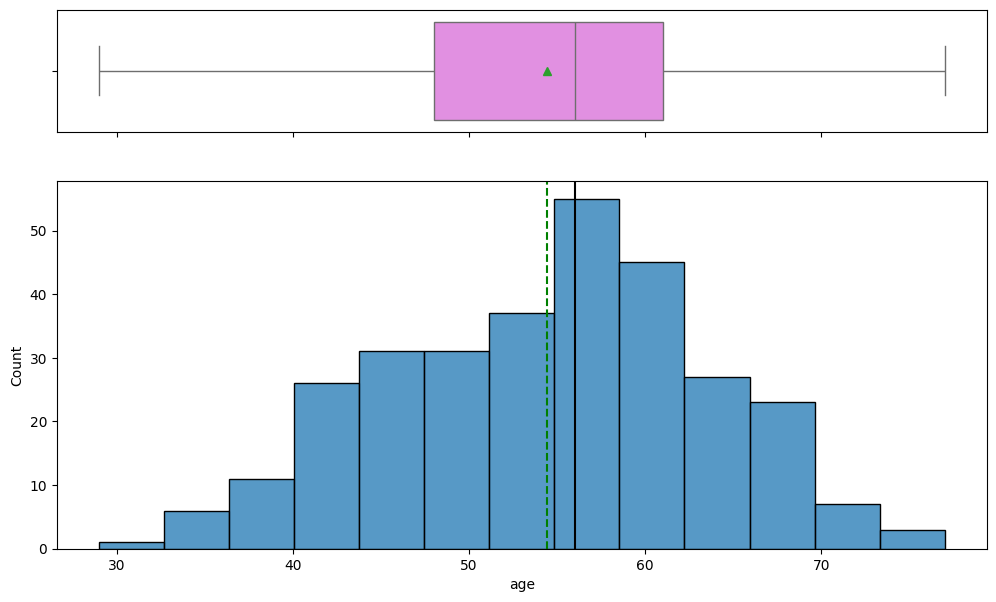

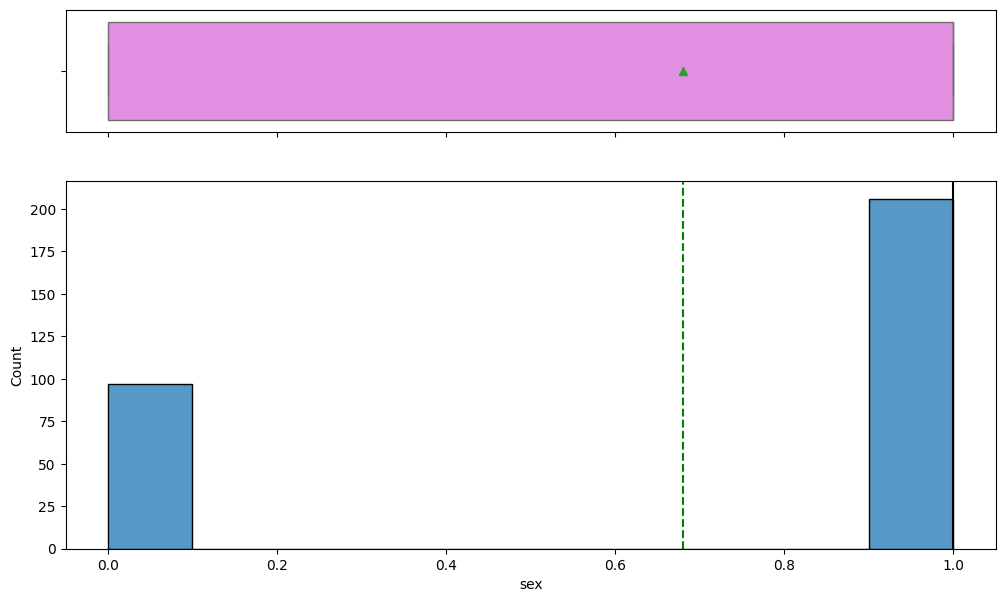

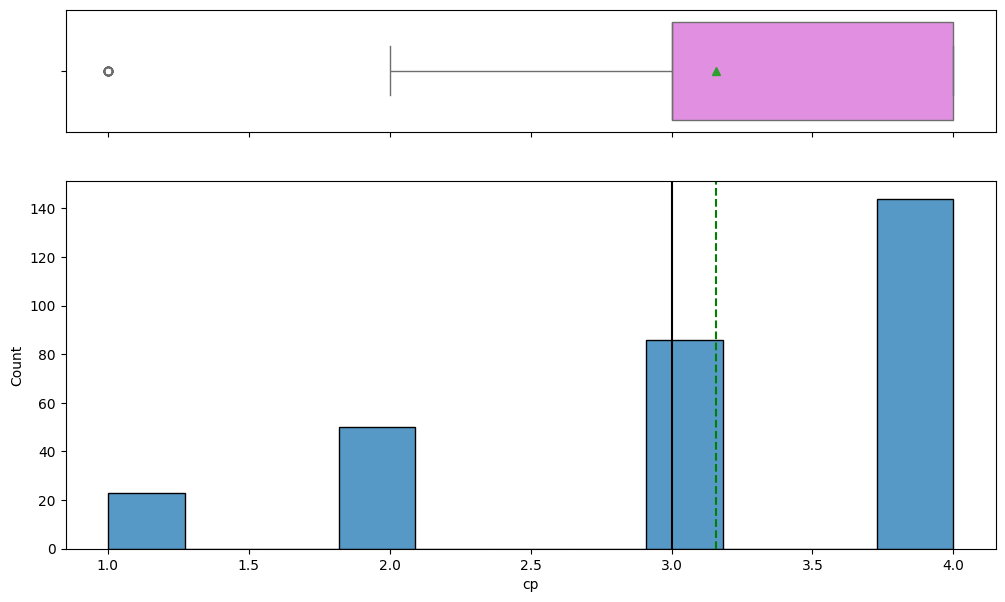

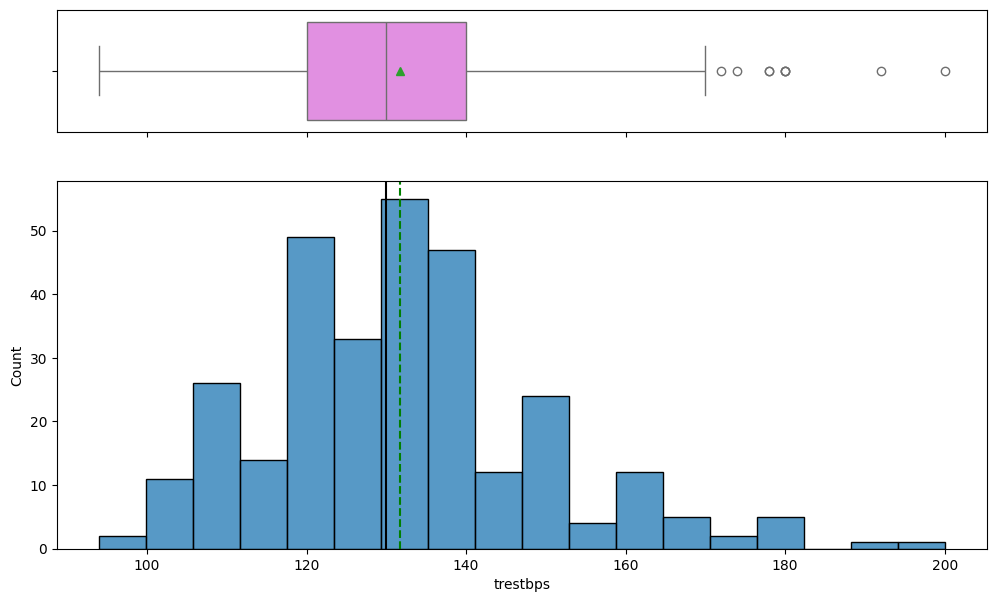

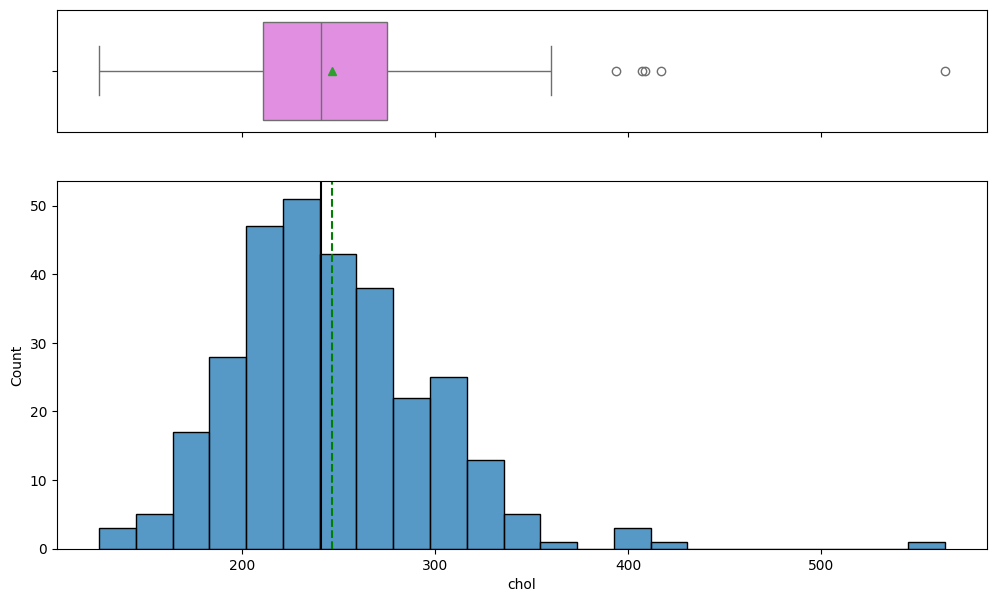

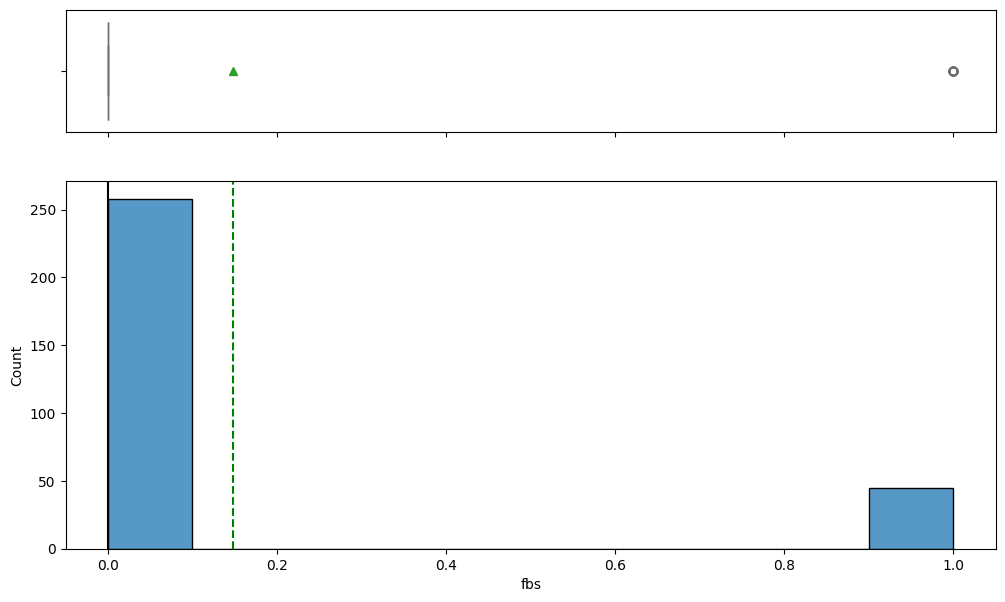

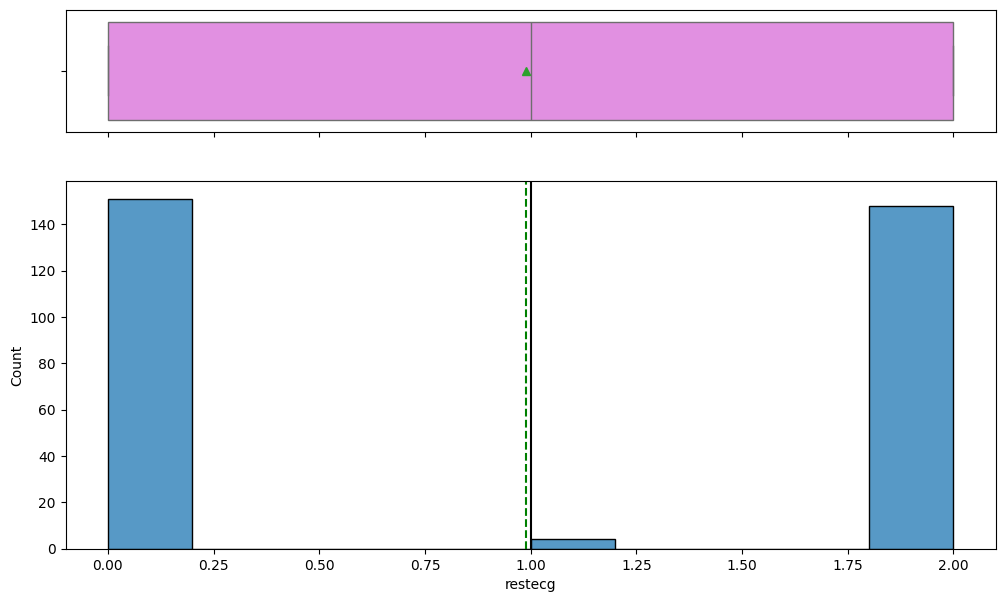

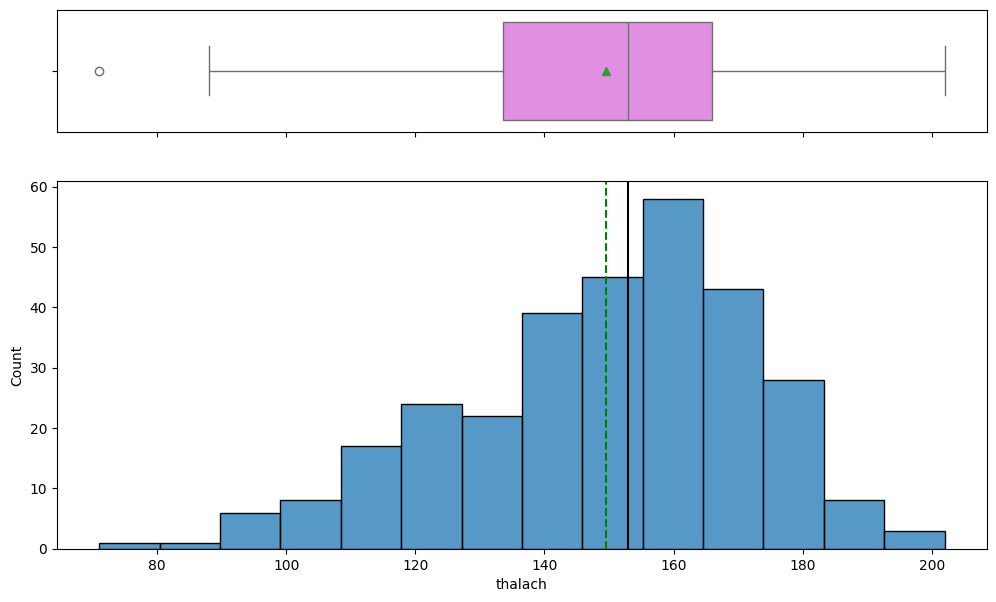

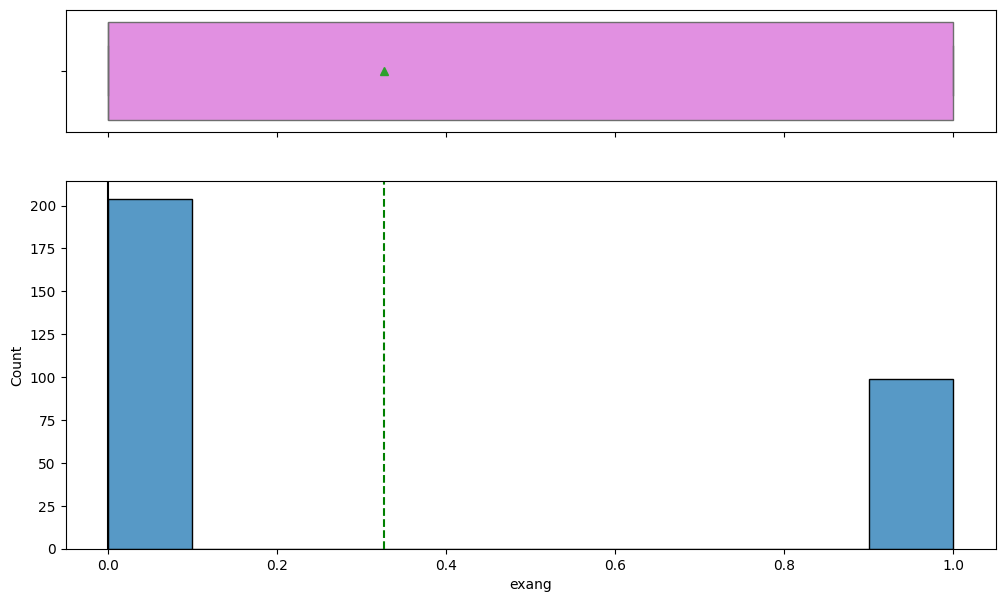

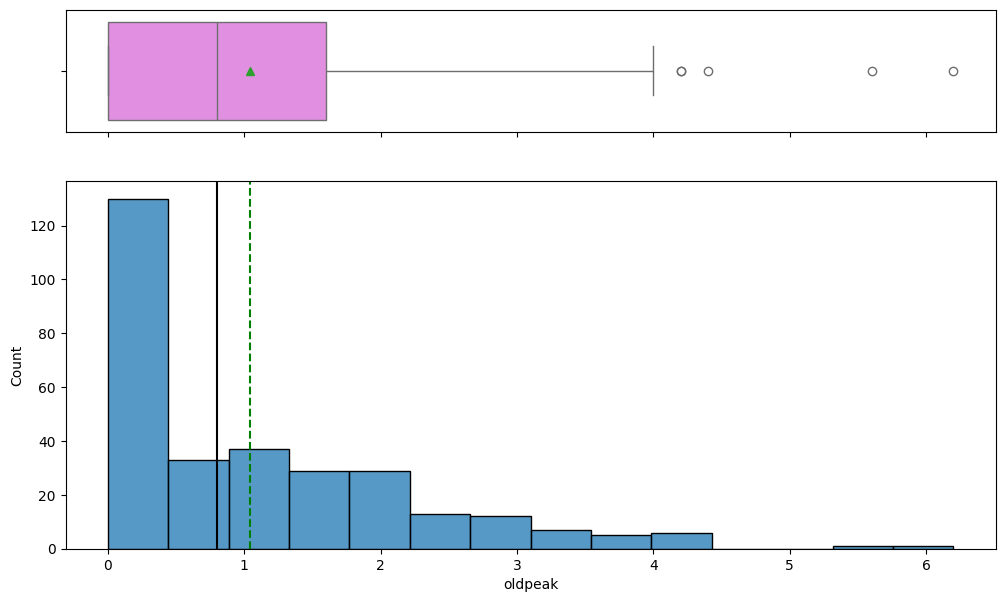

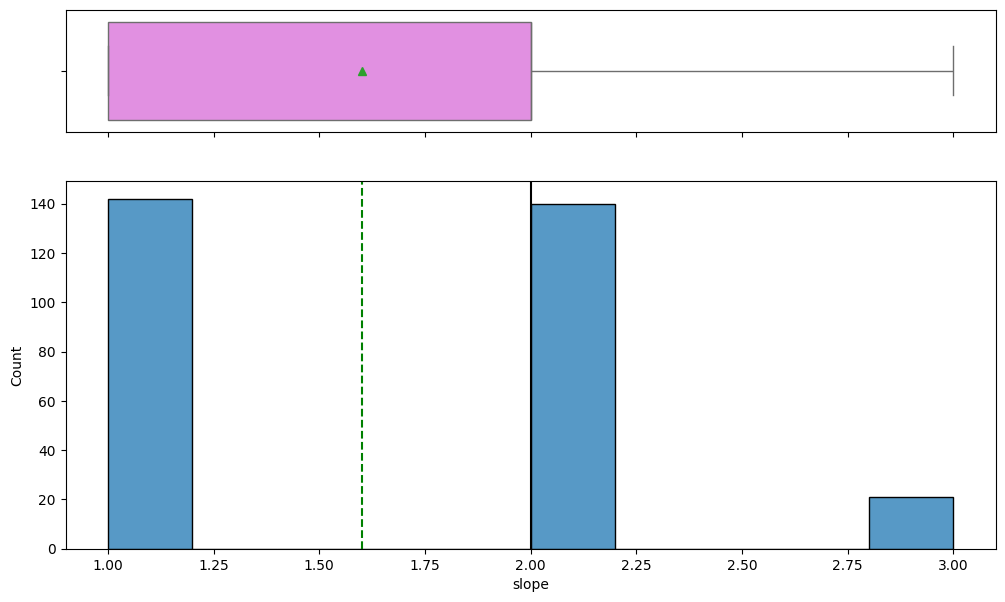

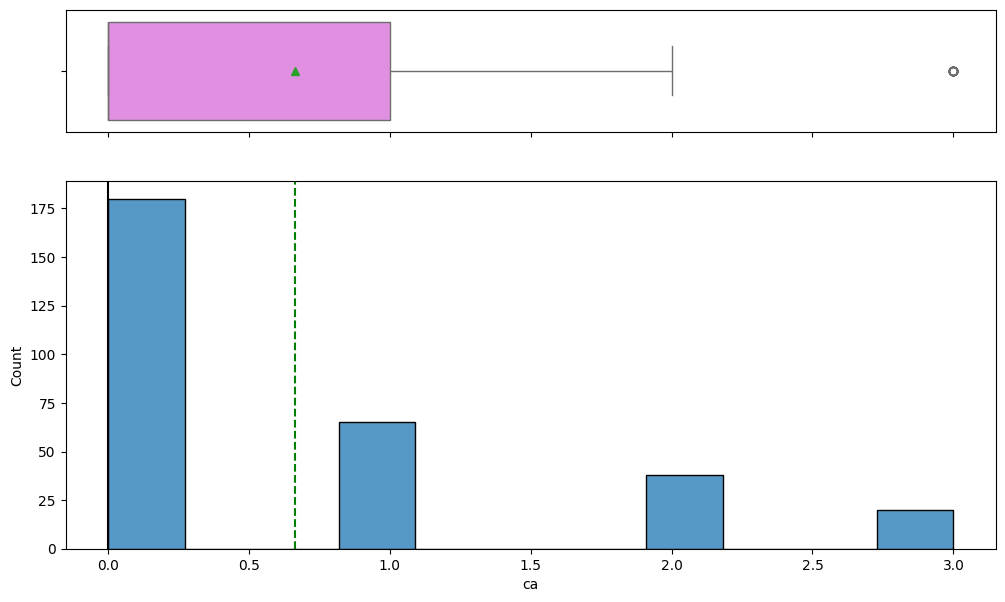

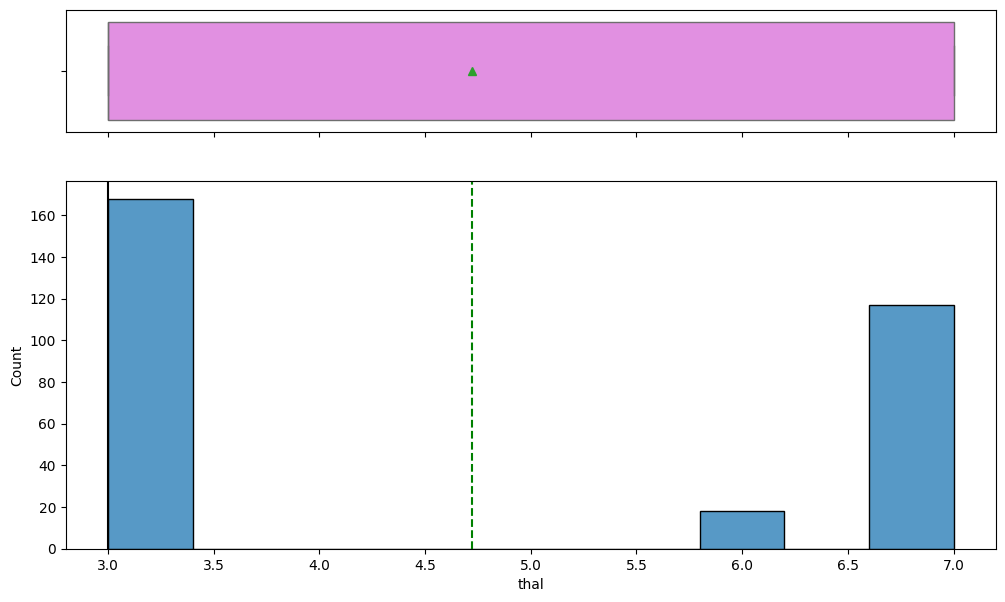

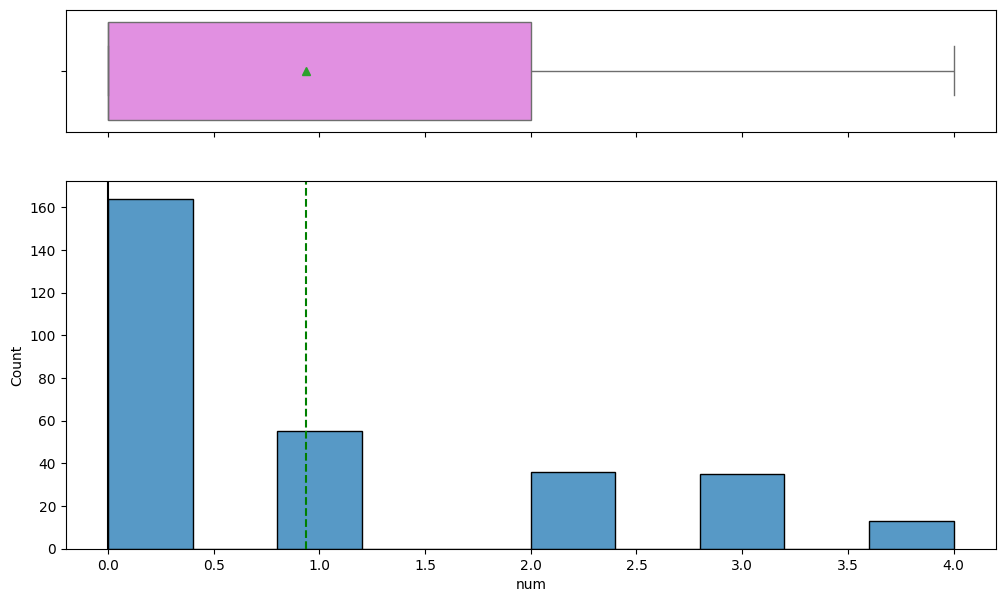

In [20]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observations**

- Current price, volatility, ROE, Cash ratio, estimated shares outstanding and P/E ratio have right-skewed distributions with upper outliers, which indicates the presence of very expensive products.
- Price change and P/B ratio have left-skewed distributions with both upper and lower outliers, which indicates presence of very cheap and expensive products but majority of the products are cheap since it is left-skewed .
- Net cash flow and net income have a right-skewed distributions with both upper and lower outliers, which indicates presence of very cheap and expensive products but majority of the products are expensive since it is right-skewed .
- Earnings per share have a symmetrical distributions with both upper and lower outliers, which indicates presence of very cheap and expensive products that are equally distributed.

### Bivariate Analysis

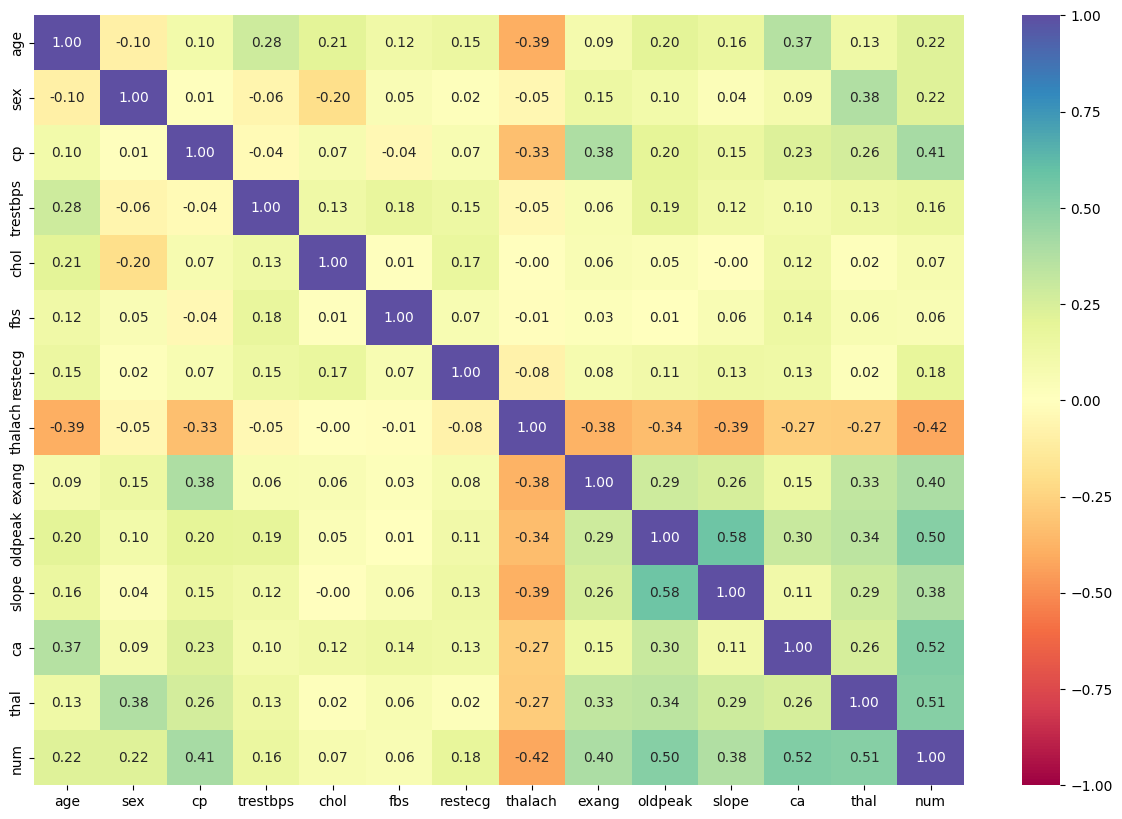

In [21]:
# Selecting only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Plotting the heatmap with the correlation matrix of the numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(),vmin=-1, vmax=1, annot=True, fmt='.2f',cmap="Spectral")
plt.show()

- Price change and volatility has very low negative correlation of negative 0.41.
- Earnings per share and estimated shares outstanding have very strong positive correlation of 0.56 and 0.59 respectively.

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

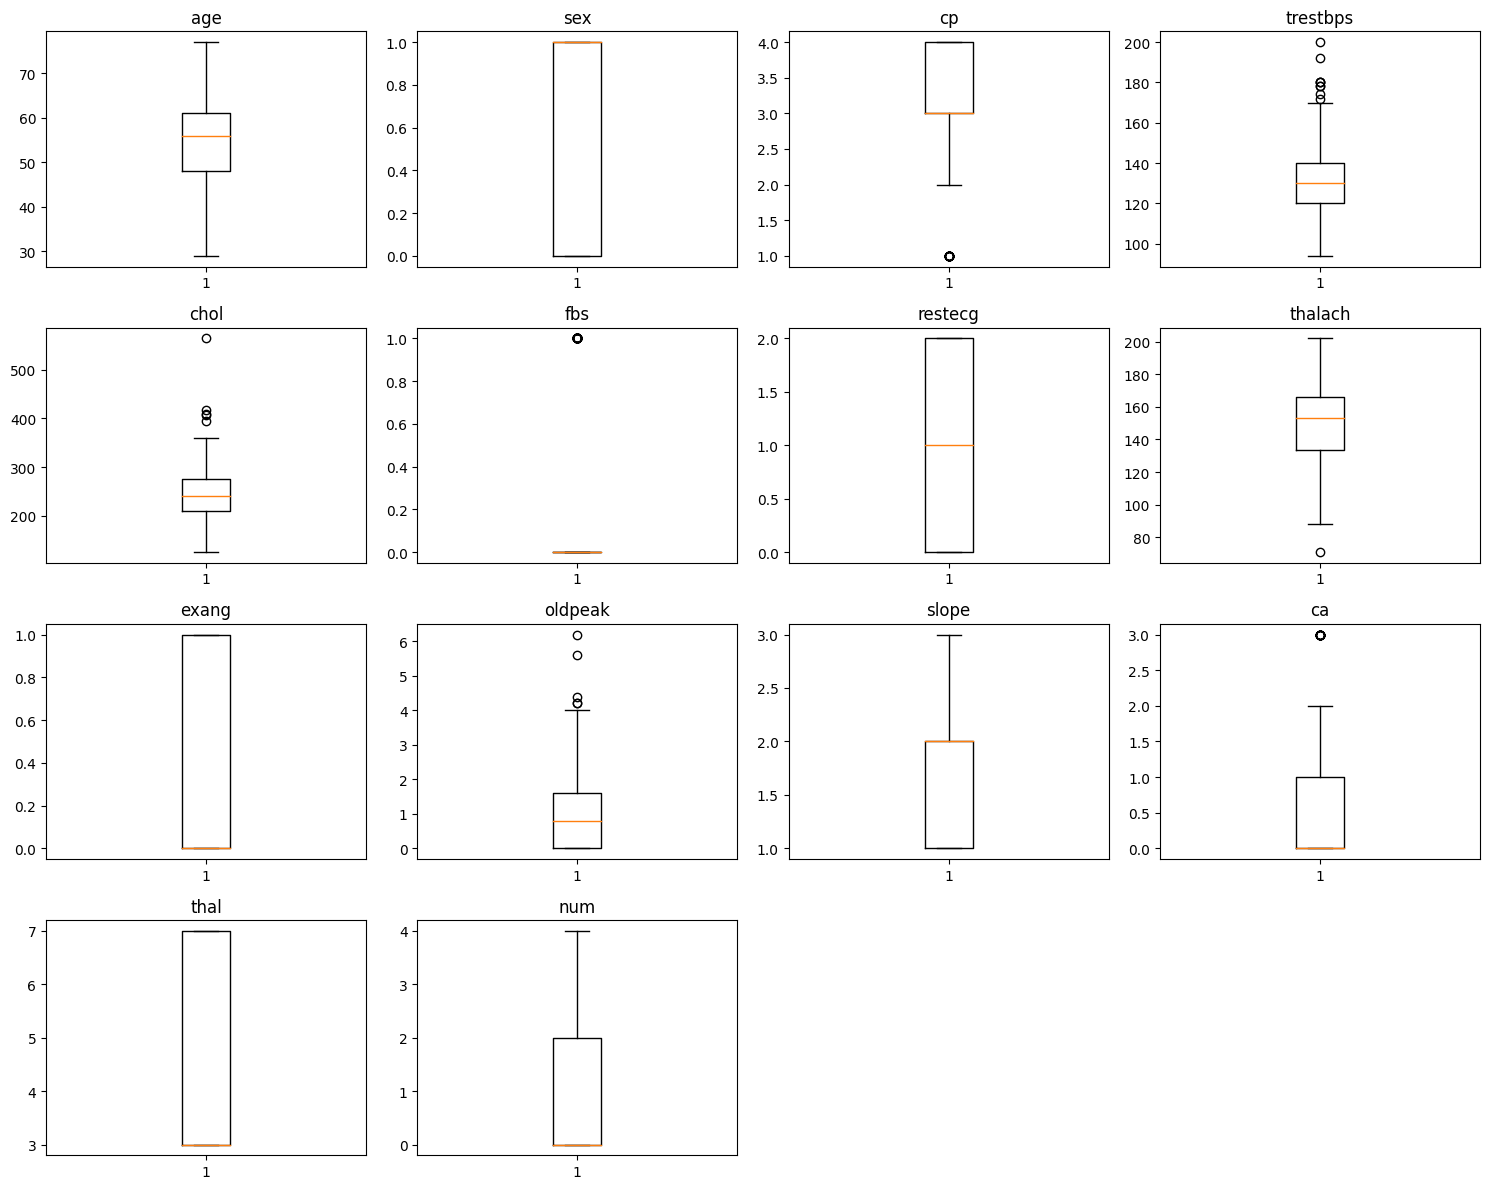

In [22]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Treating Outliers

In [23]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [24]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

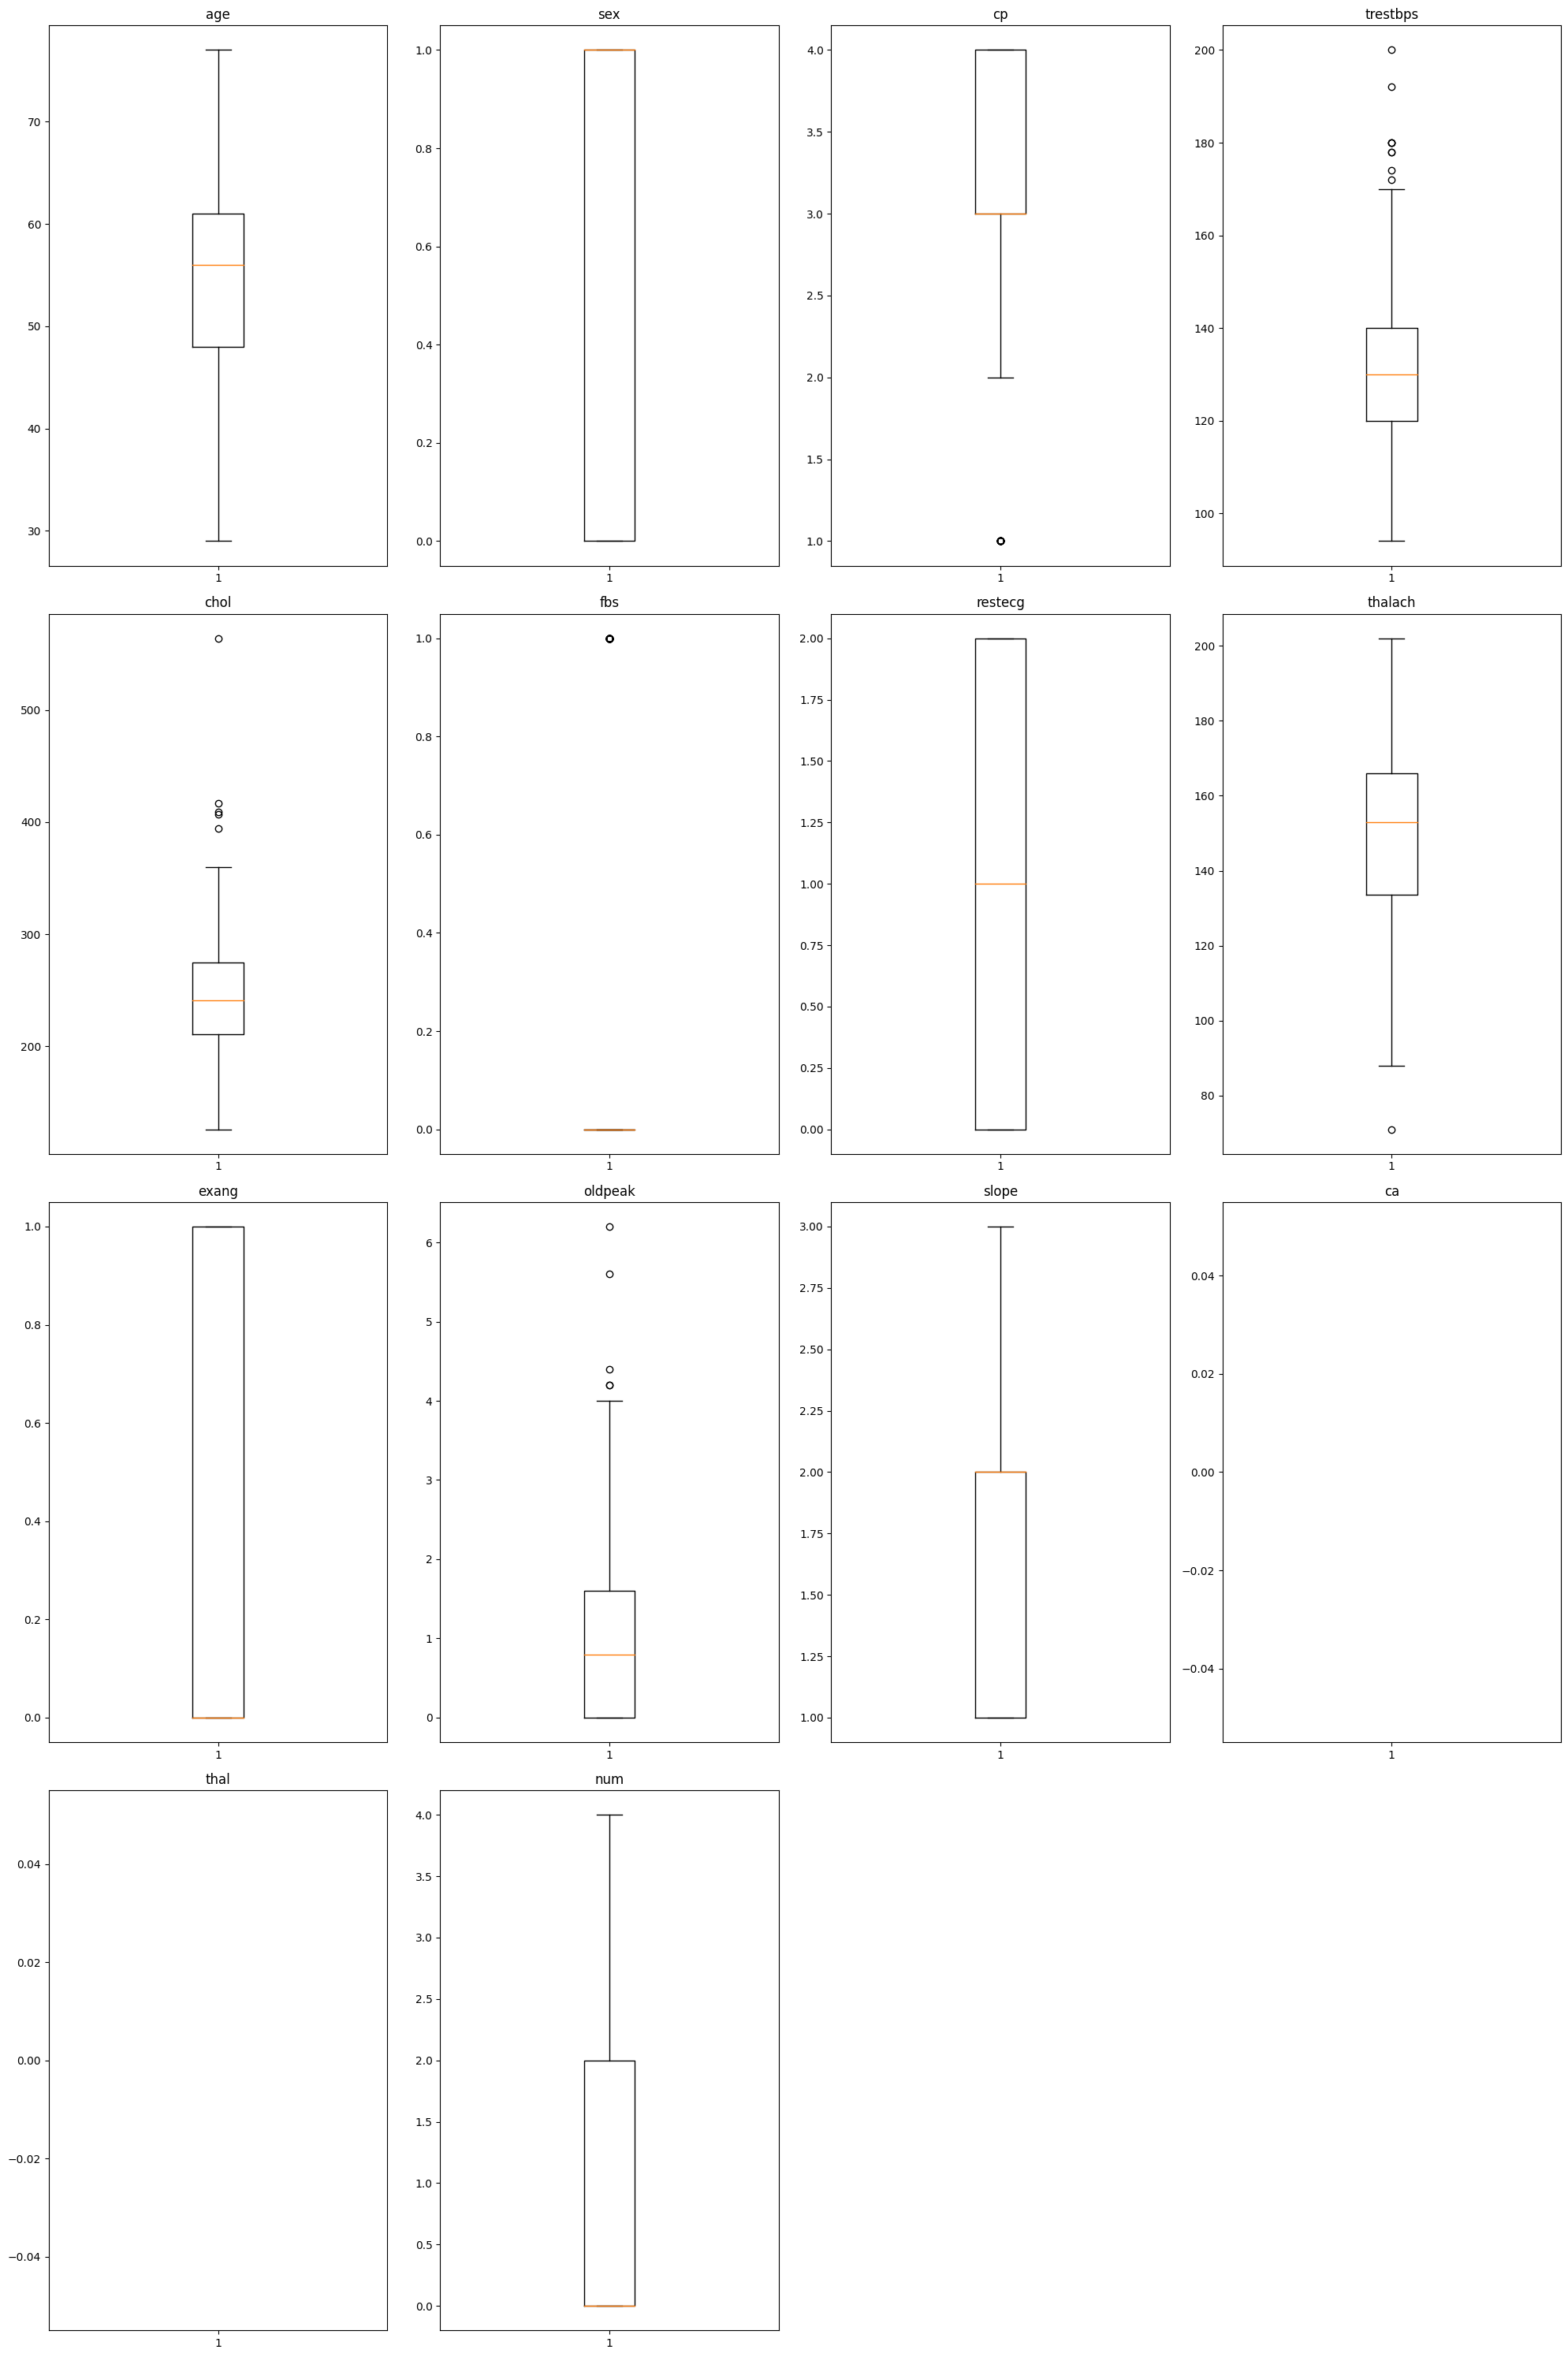

In [25]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation


**Creating training and test sets.**

In [26]:
X = df.drop(["num"], axis=1)
Y = df["num"]

X = pd.get_dummies(X, drop_first=True)
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1
)

In [27]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (242, 13)
Shape of test set :  (61, 13)
Percentage of classes in training set:
num
0    0.537190
1    0.181818
2    0.123967
3    0.111570
4    0.045455
Name: proportion, dtype: float64
Percentage of classes in test set:
num
0    0.557377
1    0.180328
3    0.131148
2    0.098361
4    0.032787
Name: proportion, dtype: float64


### Building the model

### Logistic Regression

In [28]:
# Initialize and train the logistic regression model for multiclass classification
model = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [29]:
# Creating a prediction function
y_pred = model.predict(X_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[0 0 0 3 0 0 0 4 2 1 0 0 0 1 0 0 0 0 0 1 0 2 0 3 0 0 2 1 0 2 3 1 3 1 0 1 0
 0 3 1 0 0 2 2 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0]


### Prediction Model

In [30]:
pred_y_df1 = pd.DataFrame(
    {"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test - y_pred}
)
pred_y_df1

,Actual Value,Predicted Value,Difference
204,0,0,0
159,0,0,0
219,0,0,0
174,4,3,1
184,1,0,1
295,0,0,0
269,0,0,0
119,2,4,-2
193,2,2,0
154,3,1,2


Confusion Matrix:
[[31  3  0  0  0]
 [ 7  2  1  1  0]
 [ 0  2  2  1  1]
 [ 0  2  4  2  0]
 [ 0  0  0  2  0]]


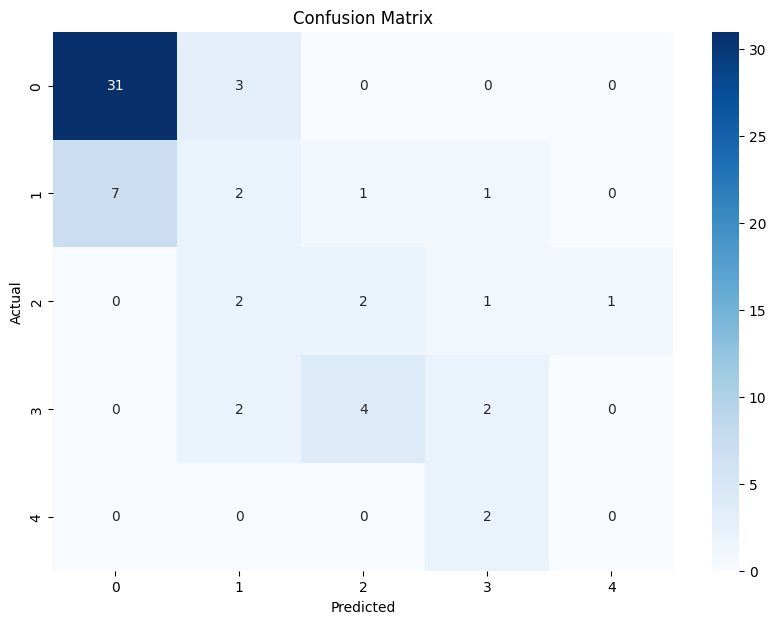

In [31]:
#Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        34
           1       0.22      0.18      0.20        11
           2       0.29      0.33      0.31         6
           3       0.33      0.25      0.29         8
           4       0.00      0.00      0.00         2

    accuracy                           0.61        61
   macro avg       0.33      0.34      0.33        61
weighted avg       0.57      0.61      0.58        61



In [33]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.6065573770491803


## Hyper-Parameter Tuning Using Grid Search CV

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

# Initialize the logistic regression model
model = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Set up grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Regularization Parameter (C):", best_params['C'])
# Print the best model
print("Best Model:", best_model)

Best Regularization Parameter (C): 0.1
Best Model: LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')


In [35]:
# Creating a prediction function
y_pred = grid_search.predict(X_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[0 0 0 3 0 0 0 3 2 1 0 0 0 0 0 0 0 0 0 1 0 1 0 3 0 0 2 1 0 2 1 1 3 0 0 1 0
 0 3 0 0 0 2 2 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]


Confusion Matrix:
[[33  1  0  0  0]
 [ 8  2  1  0  0]
 [ 1  1  2  2  0]
 [ 0  3  3  2  0]
 [ 0  0  0  2  0]]


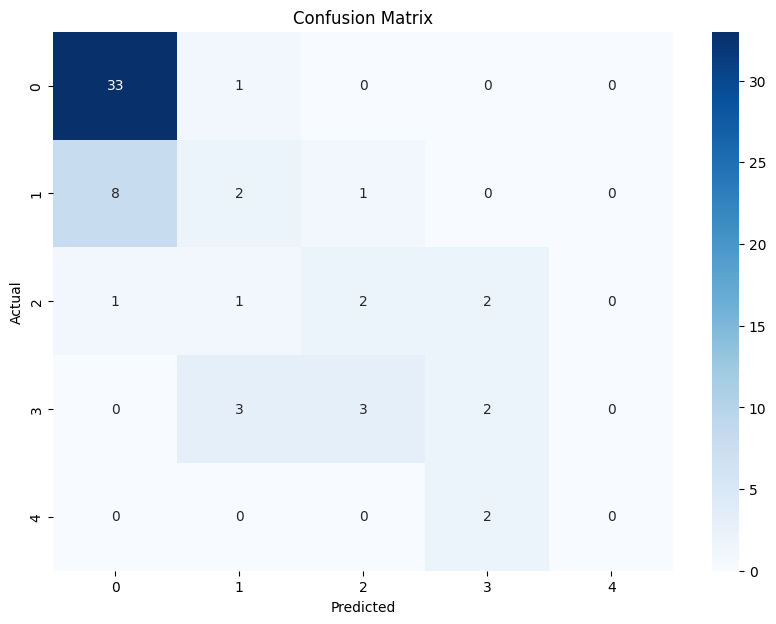

In [36]:
#Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        34
           1       0.29      0.18      0.22        11
           2       0.33      0.33      0.33         6
           3       0.33      0.25      0.29         8
           4       0.00      0.00      0.00         2

    accuracy                           0.64        61
   macro avg       0.35      0.35      0.34        61
weighted avg       0.57      0.64      0.59        61



In [38]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.639344262295082


**K-Nearest Neighbors**

In [39]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

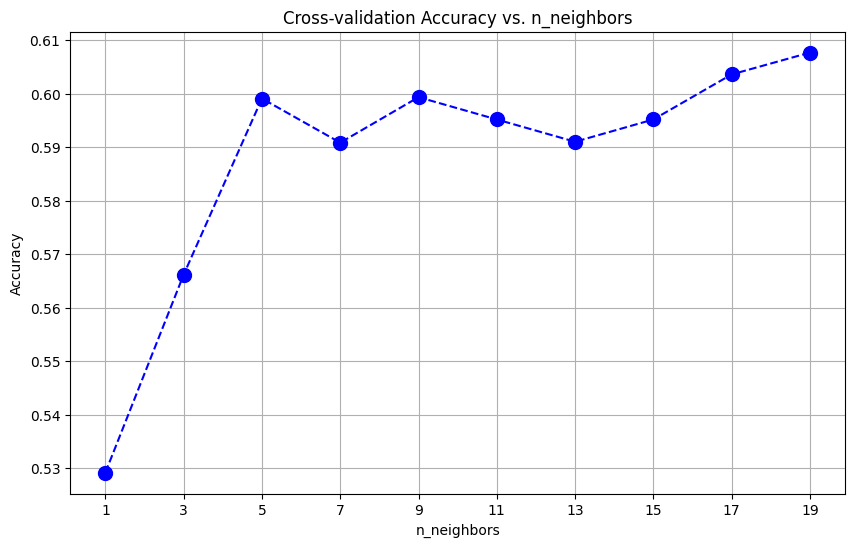

Best n_neighbors value based on cross-validation: 19


In [40]:
from sklearn.model_selection import cross_val_score

# Define a range of n_neighbors values to test
neighbors = list(range(1, 21, 2))  # Testing odd numbers from 1 to 21

# List to store cross-validation scores
cv_scores = []

# Perform 5-fold cross-validation for each n_neighbors
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the accuracy scores for different n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores, marker='o', linestyle='dashed', color='b', markersize=10)
plt.title('Cross-validation Accuracy vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

# Print the best n_neighbors value
best_n = neighbors[cv_scores.index(max(cv_scores))]
print(f"Best n_neighbors value based on cross-validation: {best_n}")


In [41]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=19)

In [42]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [43]:
pred_y_df2 = pd.DataFrame(
    {"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test - y_pred}
)
pred_y_df2

,Actual Value,Predicted Value,Difference
204,0,0,0
159,0,0,0
219,0,0,0
174,4,1,3
184,1,0,1
295,0,0,0
269,0,0,0
119,2,1,1
193,2,0,2
154,3,1,2


Confusion Matrix:
[[33  1  0  0  0]
 [ 6  2  2  1  0]
 [ 2  3  0  1  0]
 [ 0  8  0  0  0]
 [ 0  2  0  0  0]]


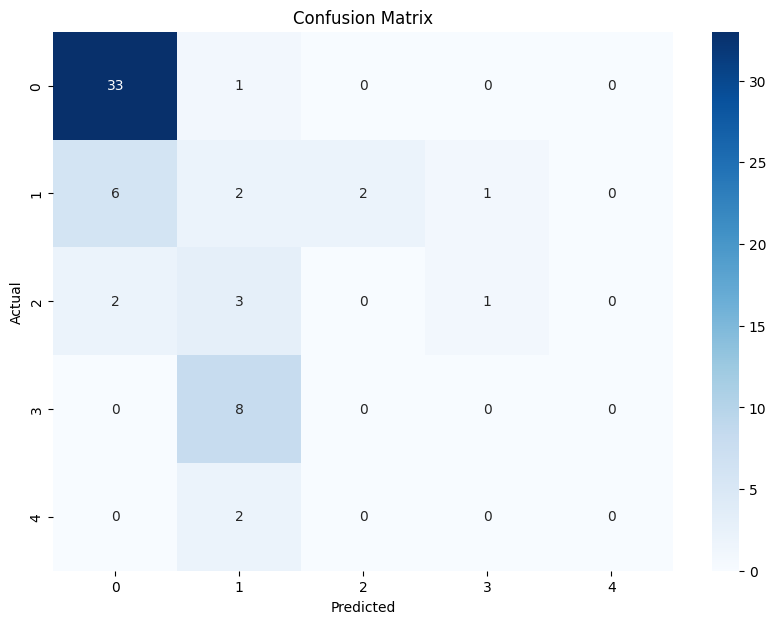

In [44]:
# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        34
           1       0.12      0.18      0.15        11
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2

    accuracy                           0.57        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.47      0.57      0.52        61



In [46]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.5737704918032787


## Hyper-Parameter Tuning Using Grid Search CV

In [47]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Set up grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best number of neighbors
print("Best Number of Neighbors (n_neighbors):", best_params['n_neighbors'])

# Print the best KNN model
print("Best KNN Model:", best_model)


Best Number of Neighbors (n_neighbors): 19
Best KNN Model: KNeighborsClassifier(n_neighbors=19)


In [48]:
# Predict on the test set
y_pred = grid_search.predict(X_test)

Confusion Matrix:
[[33  1  0  0  0]
 [ 6  2  2  1  0]
 [ 2  3  0  1  0]
 [ 0  8  0  0  0]
 [ 0  2  0  0  0]]


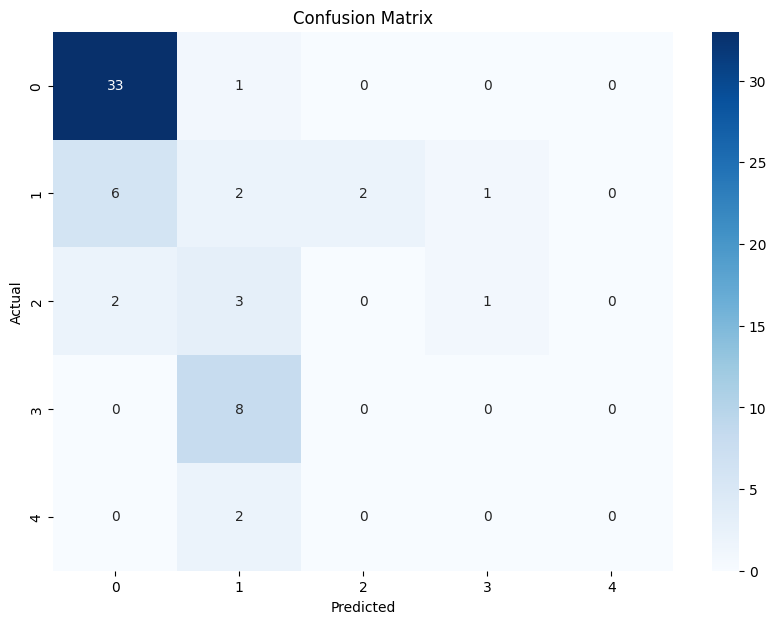

In [49]:
# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        34
           1       0.12      0.18      0.15        11
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2

    accuracy                           0.57        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.47      0.57      0.52        61



In [51]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.5737704918032787


___